In [ ]:
import numpy as np #numerical python
import pandas as pd #manipulation
from sklearn.model_selection import train_test_split
from sklearn import tree #tree pacakge for decision tree model
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('heart.csv')
df.head()
# 0 ---> mild pain
# 1<2<3
# 3 --> s handle

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribuition')

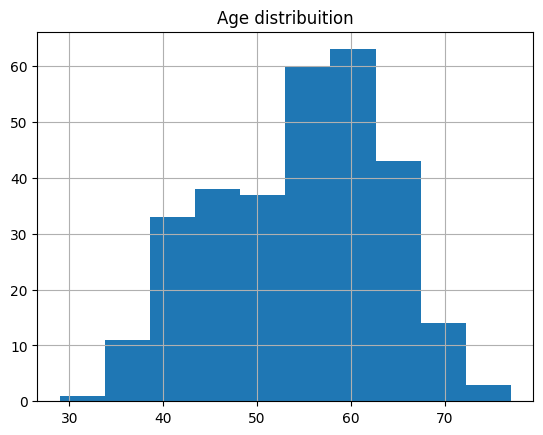

In [ ]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')

<ipython-input-4-0d501e0f25ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='female')
<ipython-input-4-0d501e0f25ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label='male')


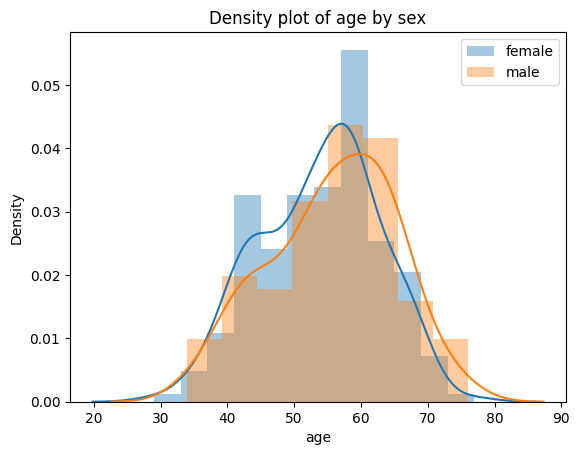

In [ ]:
sns.distplot(df[df['sex']==1]['age'],  label='female')
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(df, x='trestbps', nbins=10, title='Resting Blood Pressure Distribution')
fig.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



<Axes: xlabel='oldpeak'>

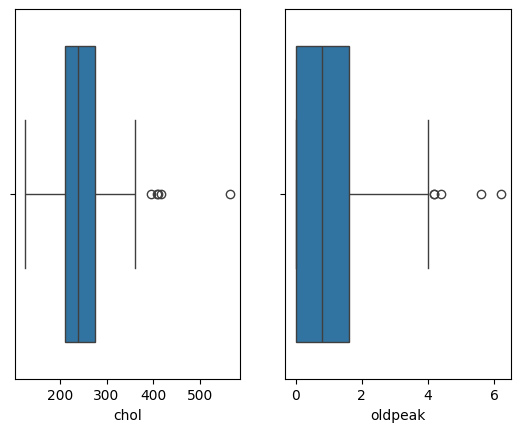

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])


In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, y='chol', title='Cholesterol Boxplot')

# Add a new boxplot to the subplot
fig.add_box(y=df['oldpeak'], name='Oldpeak')


fig.show()
fig.write_html('plotly_grapgh.html')  #if you want to download the report in html format

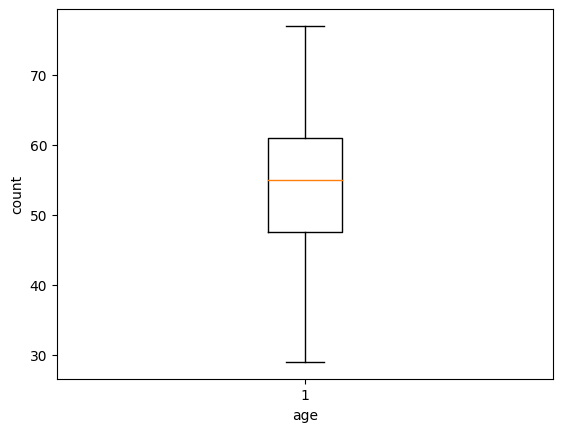

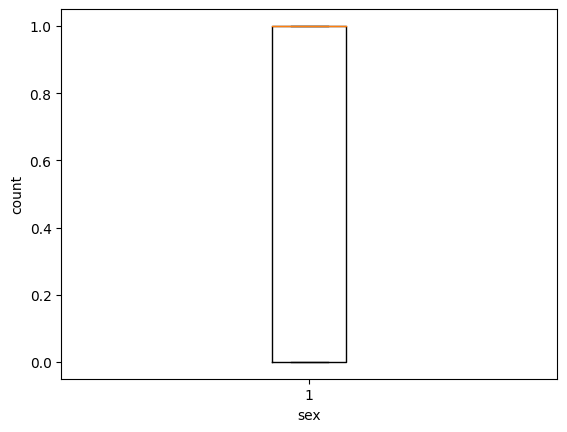

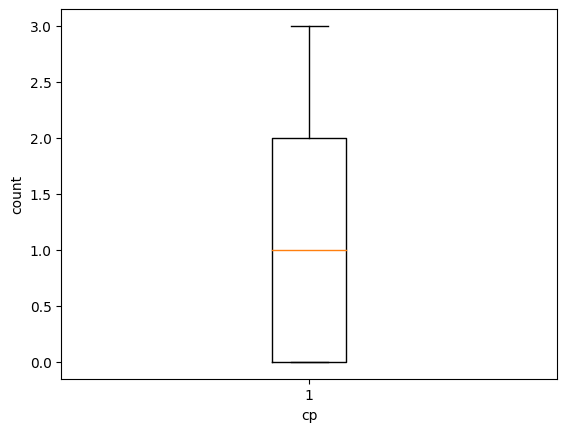

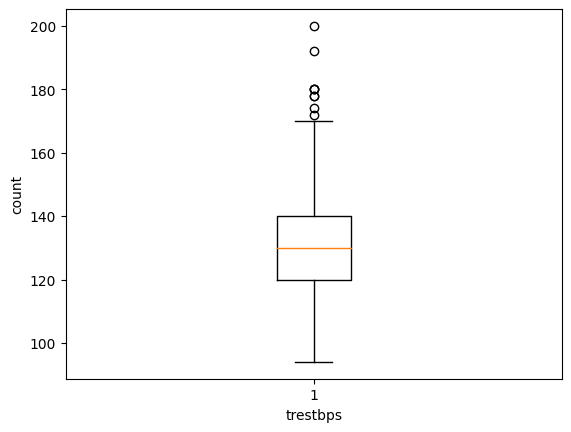

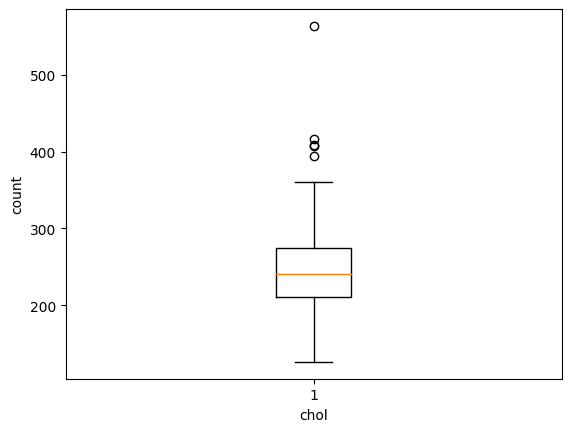

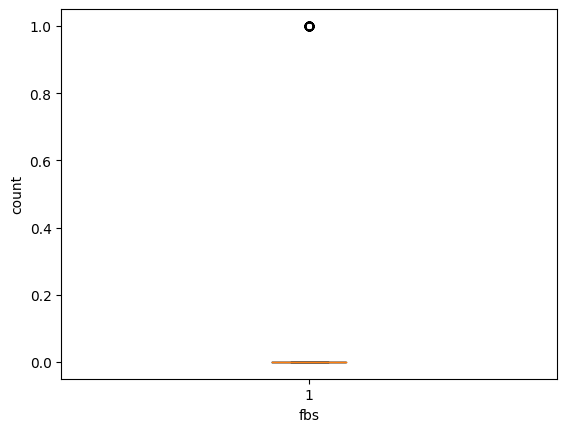

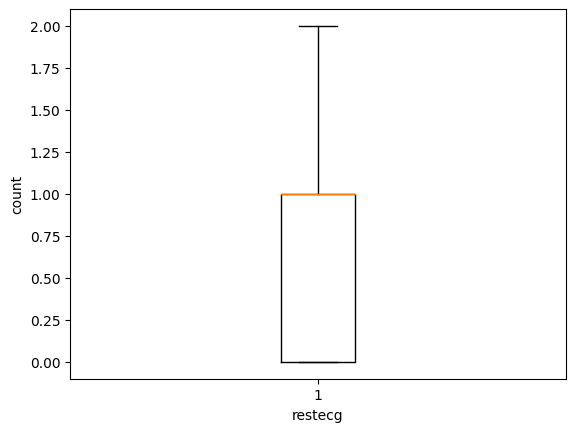

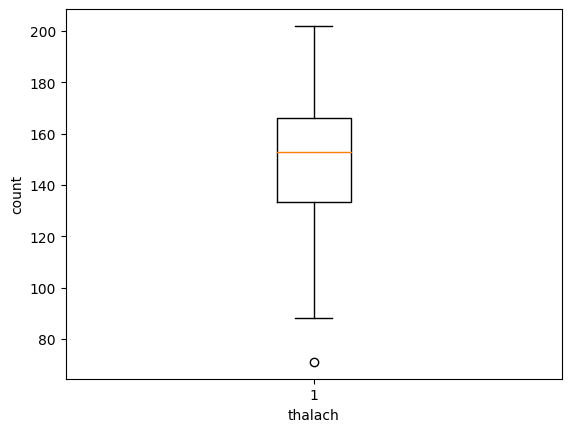

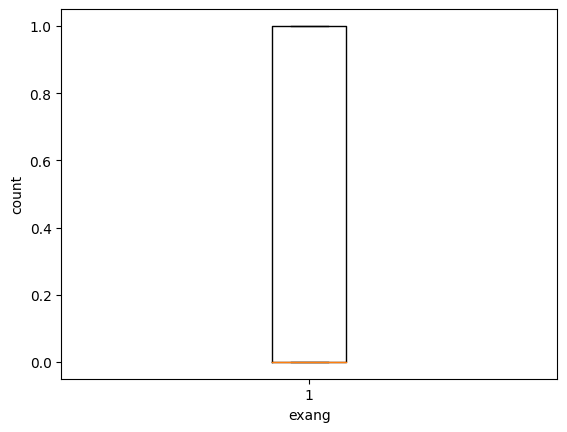

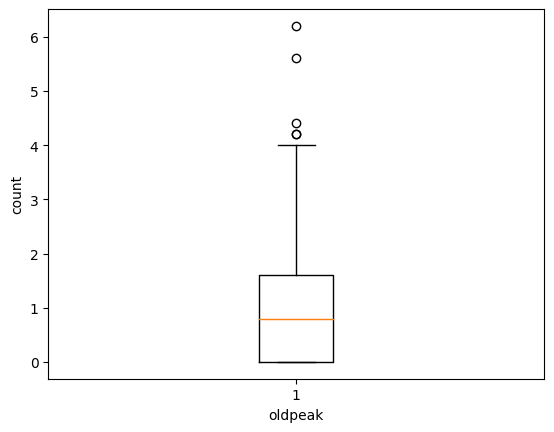

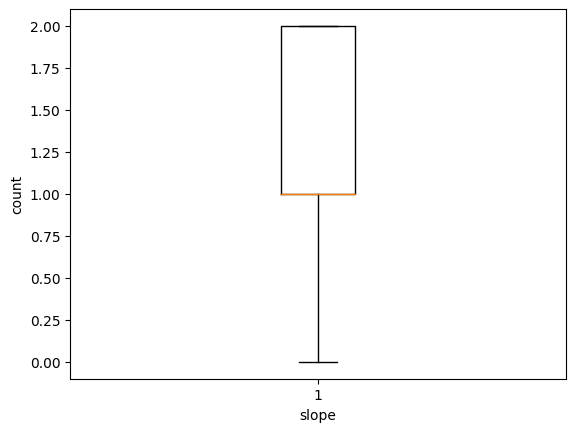

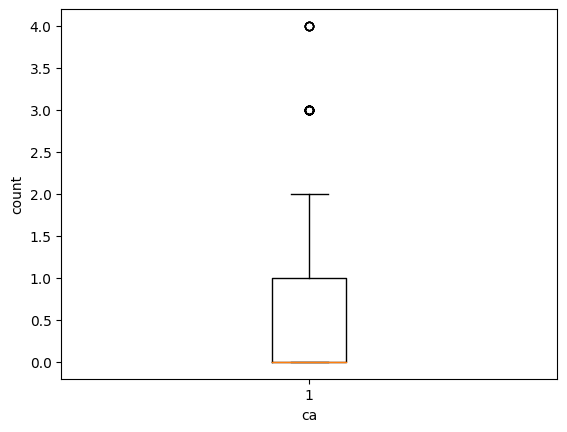

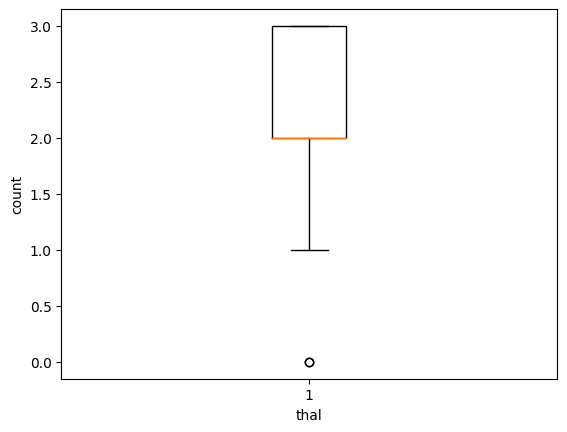

In [ ]:
for i in df.columns:
  if ((df[i].dtype!="object") & (i != "target")):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

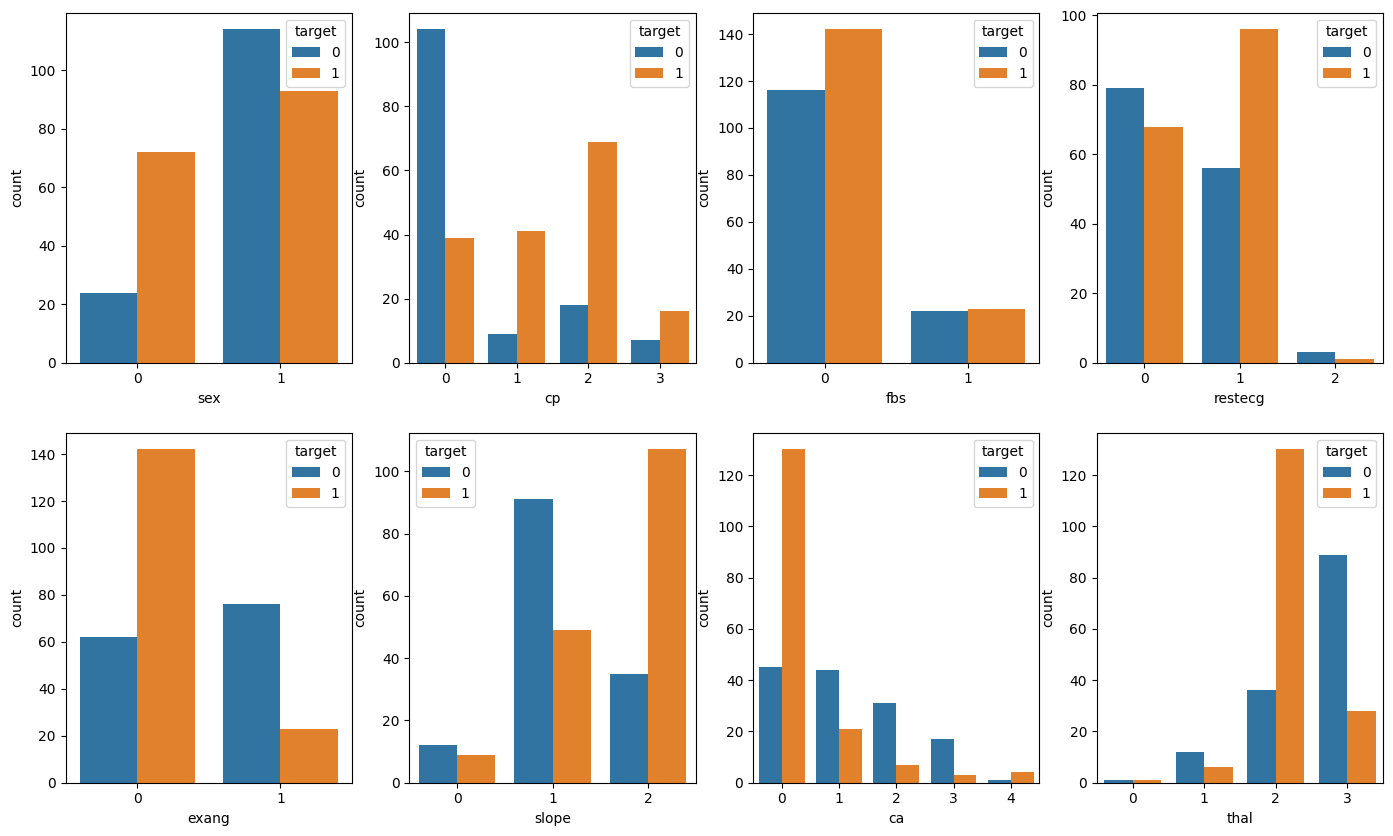

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]   #0/4=(0),0%4=0
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

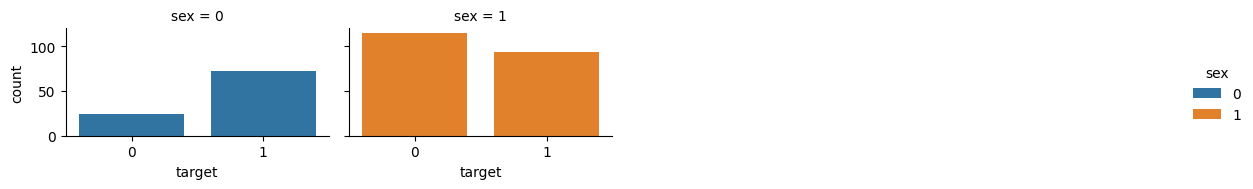

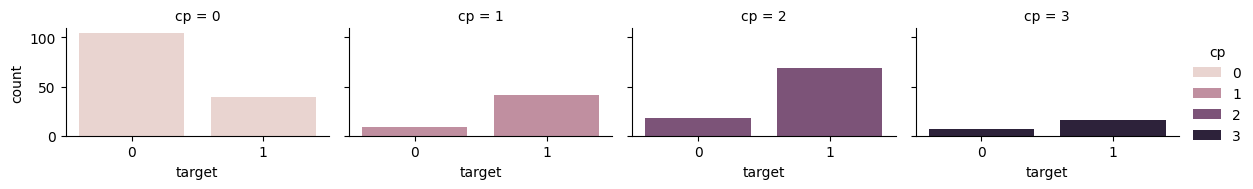

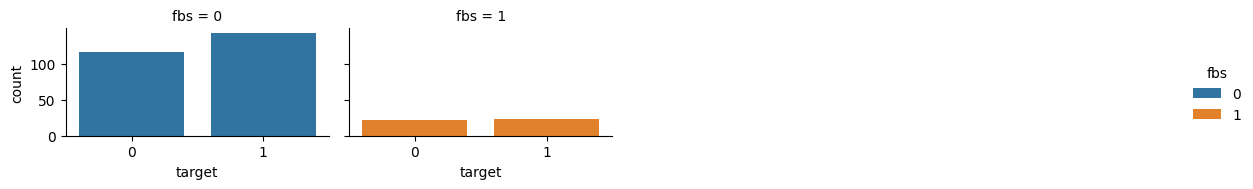

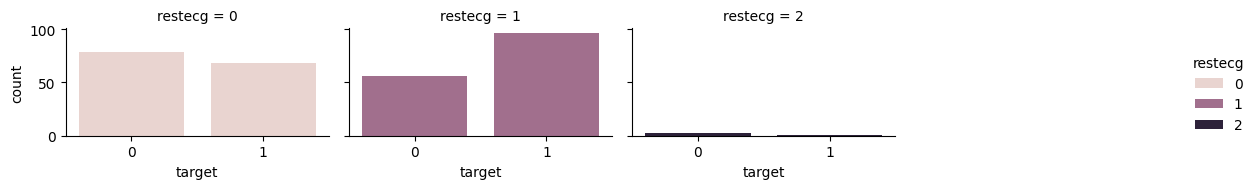

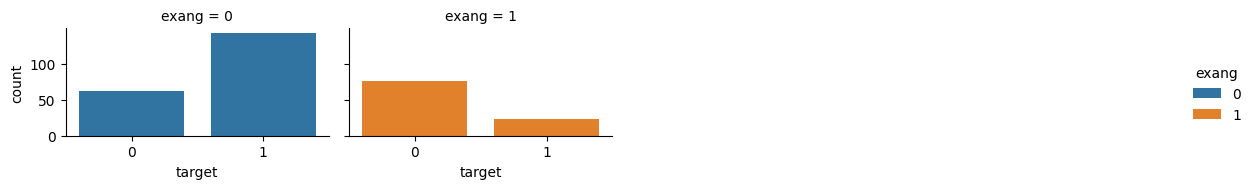

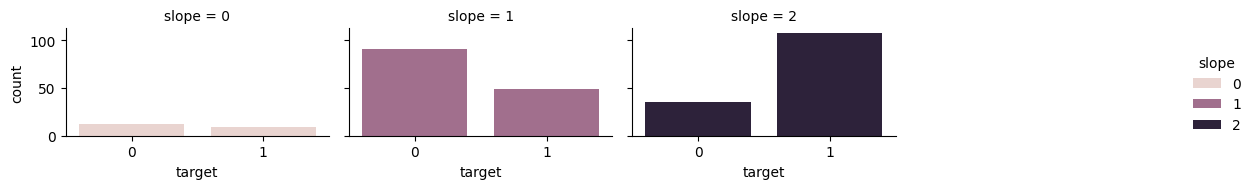

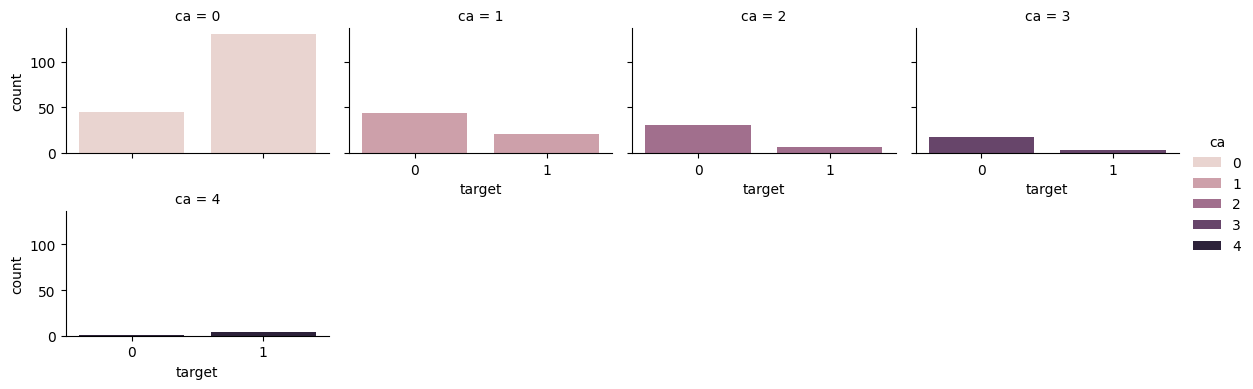

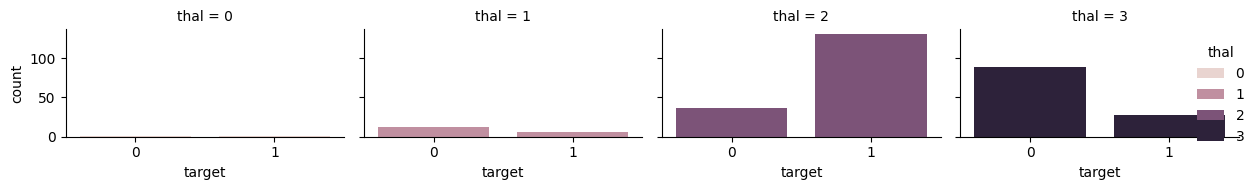

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a single row with 8 columns
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[0], col=cat_feat[0], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[1], col=cat_feat[1], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[2], col=cat_feat[2], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[3], col=cat_feat[3], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[4], col=cat_feat[4], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[5], col=cat_feat[5], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[6], col=cat_feat[6], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[7], col=cat_feat[7], col_wrap=4, height=2, aspect=1.5)

plt.tight_layout()
plt.show()


Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

Text(0.5, 1.0, 'Count of target feature by sex')

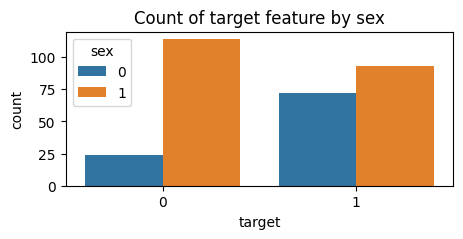

In [ ]:
plt.rcParams['figure.figsize'] = (5,2)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

> Indented block



<Axes: >

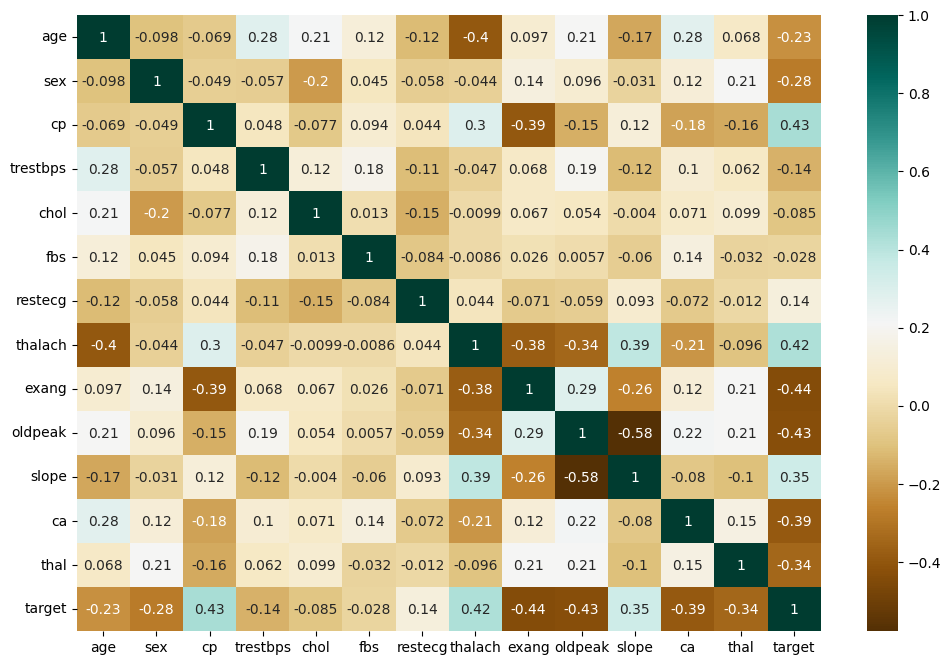

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')

In [ ]:
!pip install autoviz #autovisualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 12.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/2

In [ ]:
import pandas as pd

data = pd.read_csv('heart.csv')


In [ ]:
!pip install sweetviz
#sweetvisualzation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.7 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


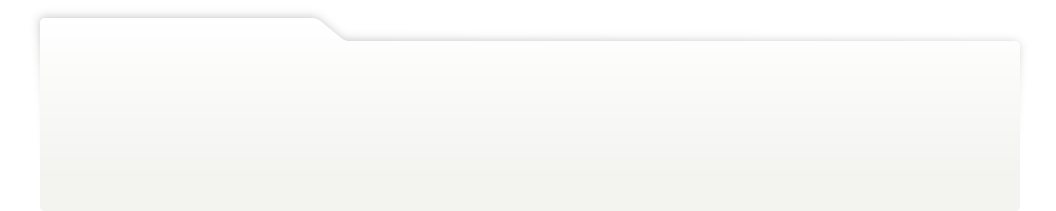
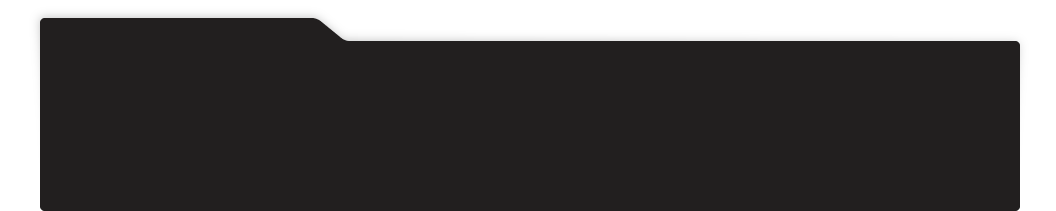
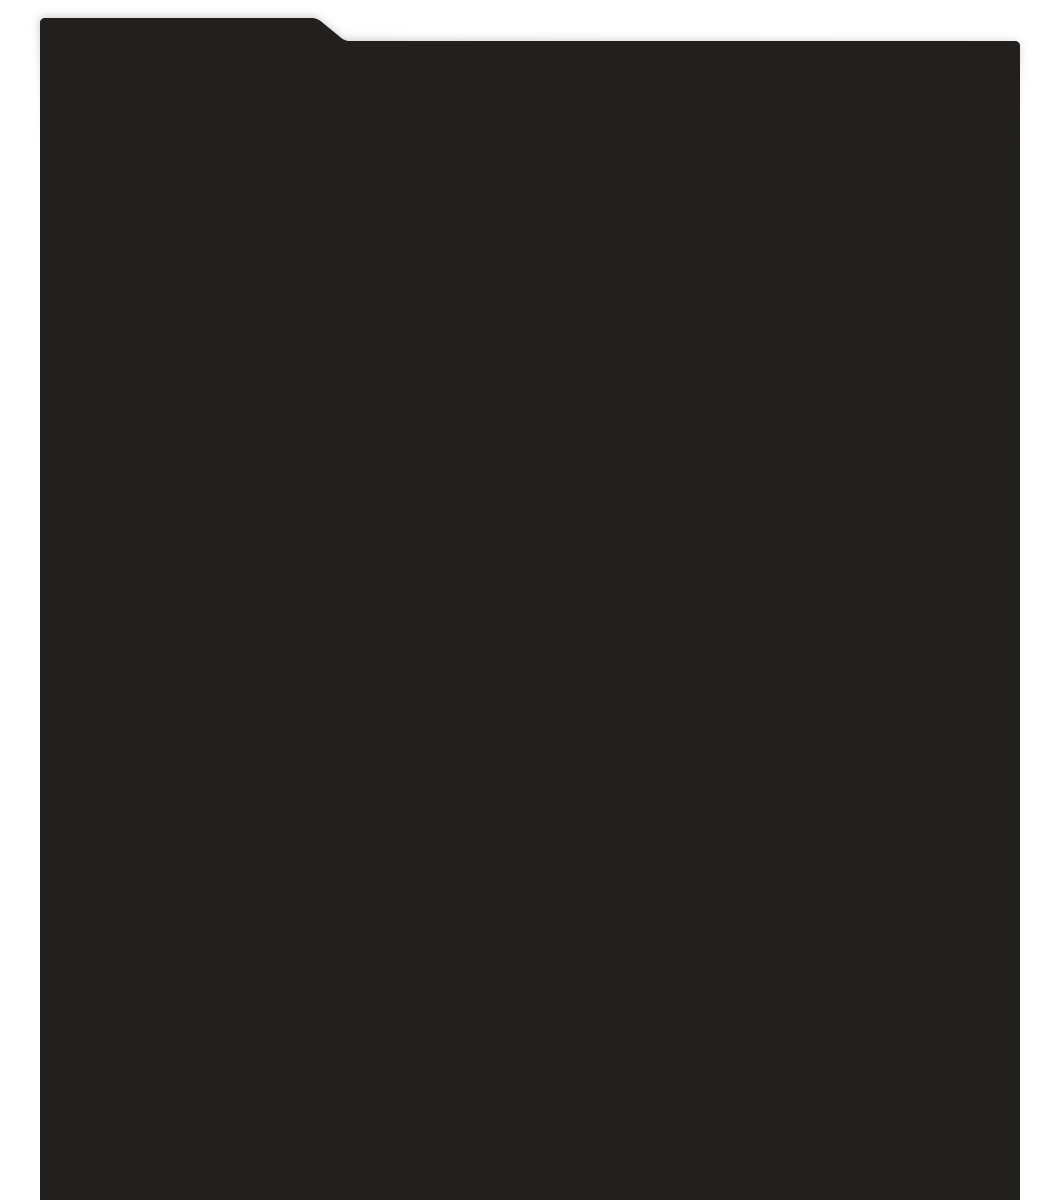
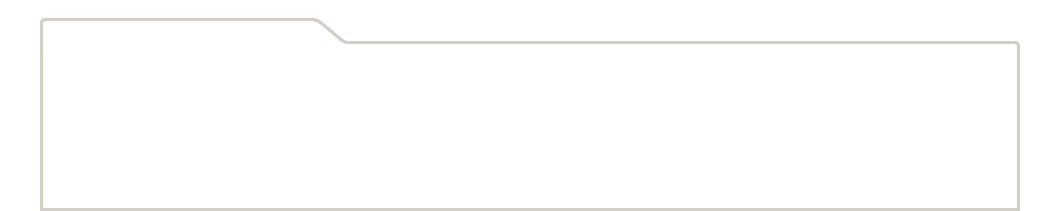
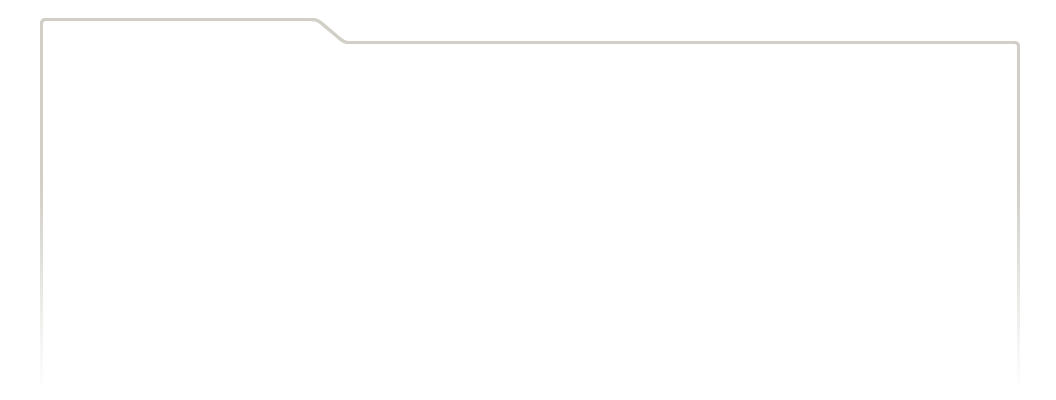
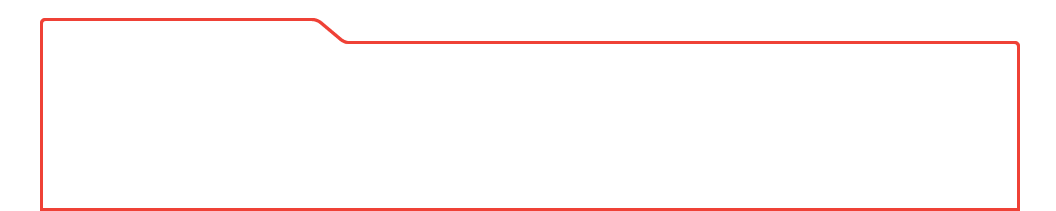
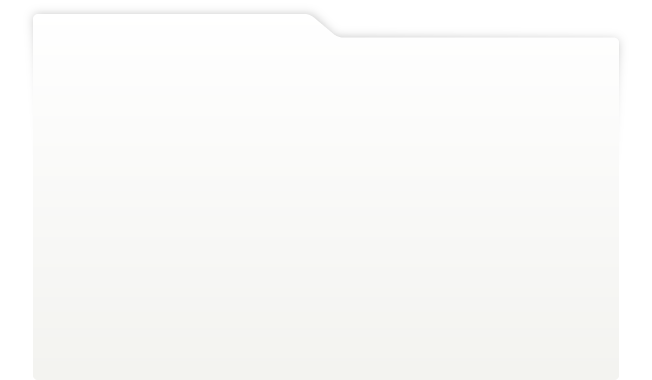
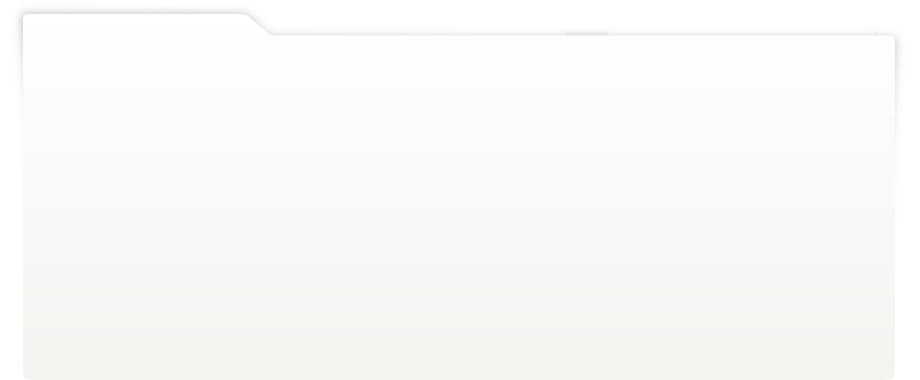
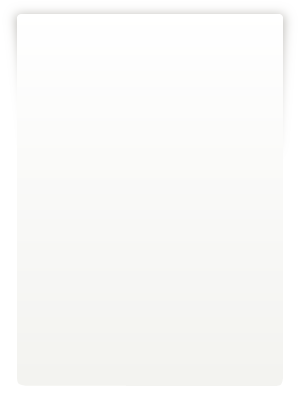
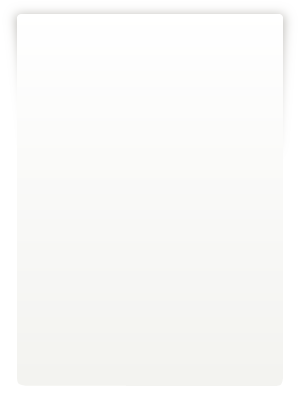
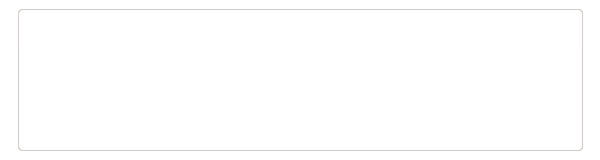
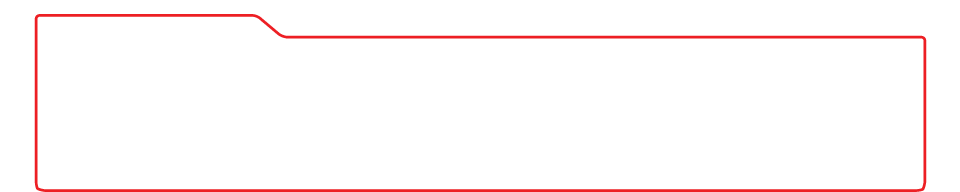
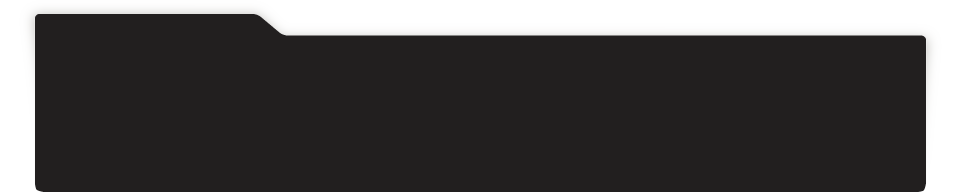
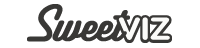
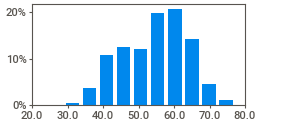
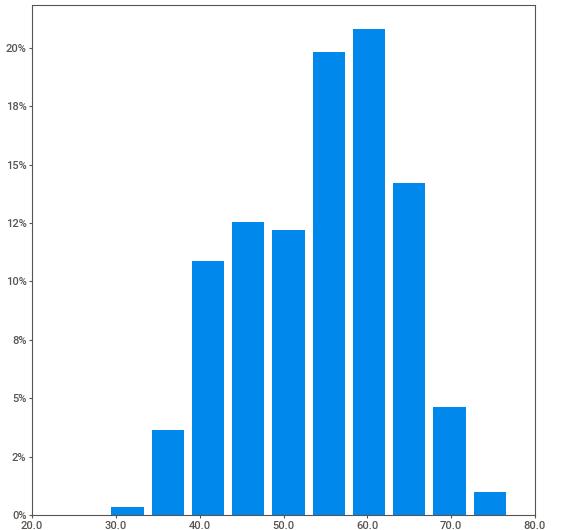
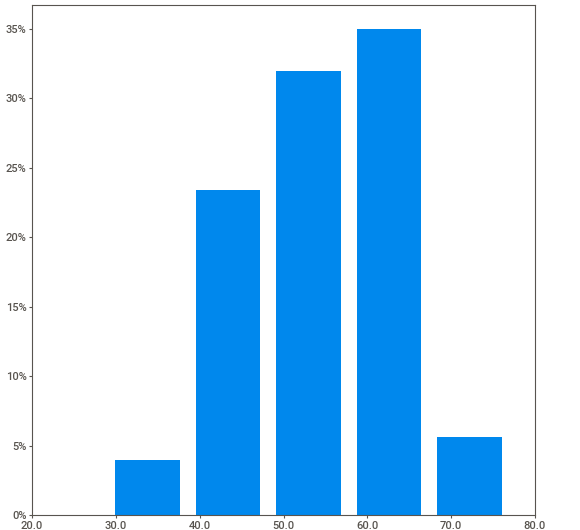
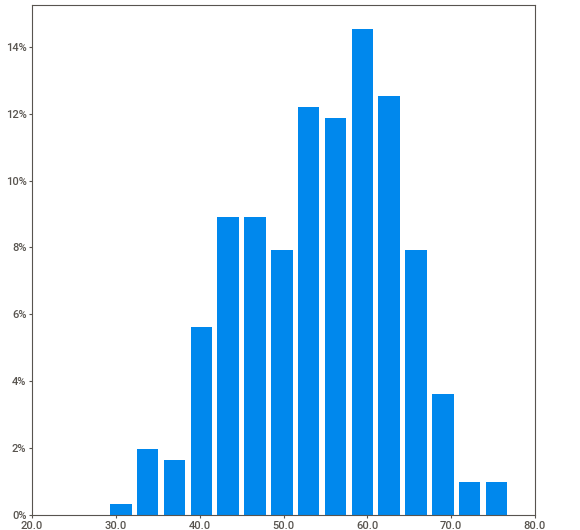
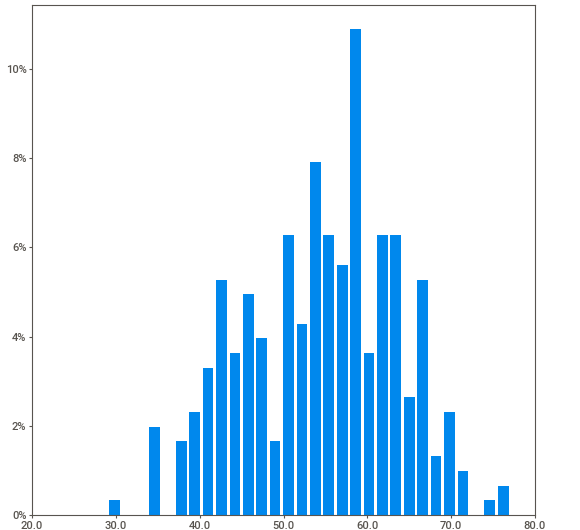
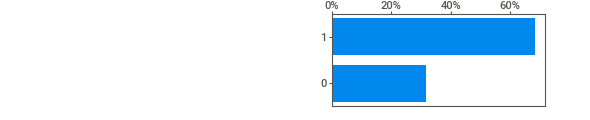
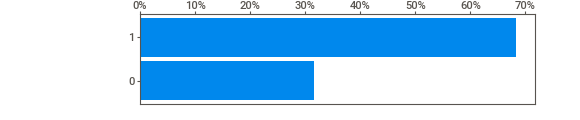
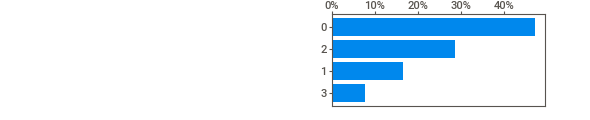
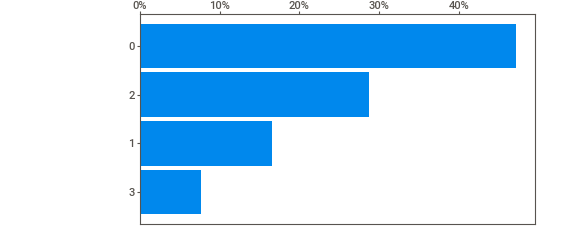
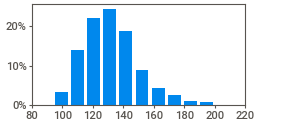
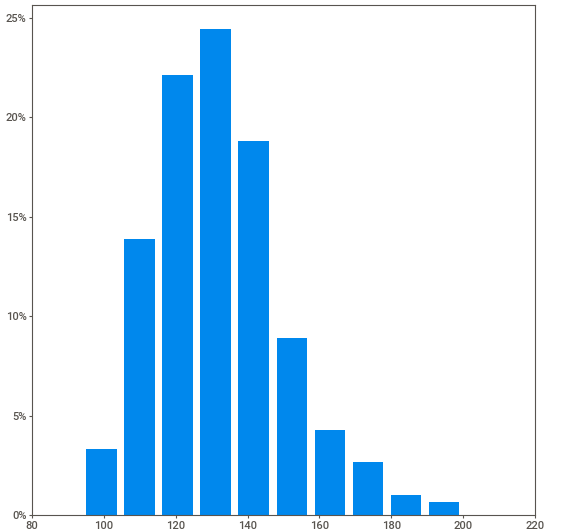
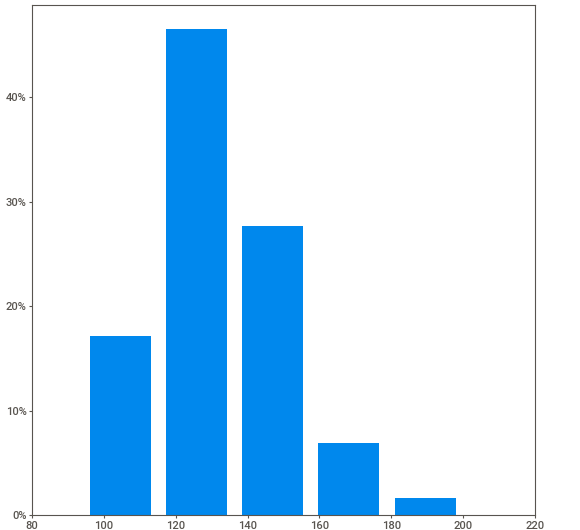
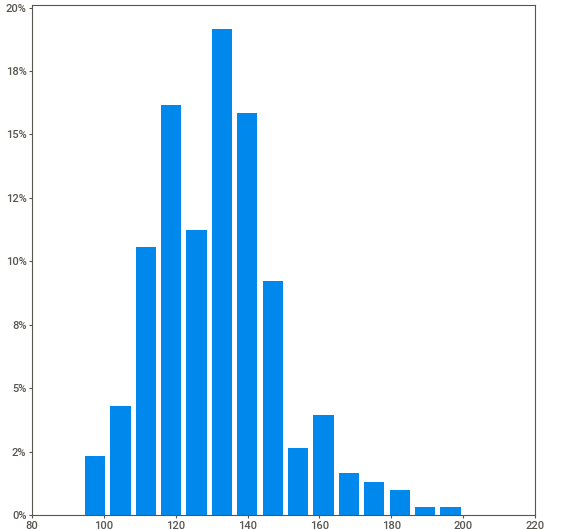
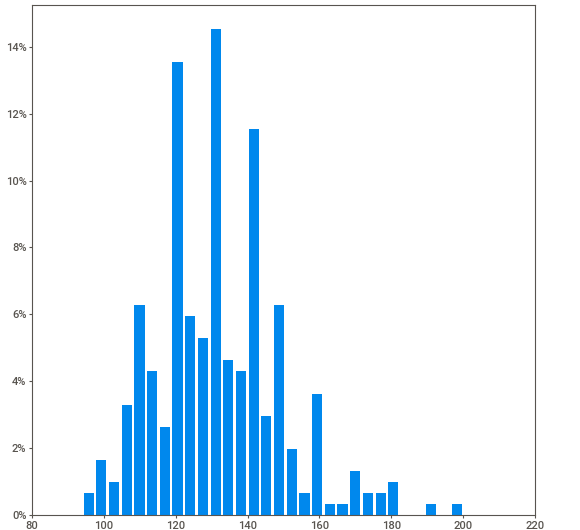
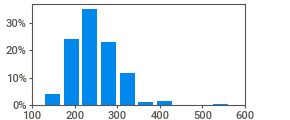
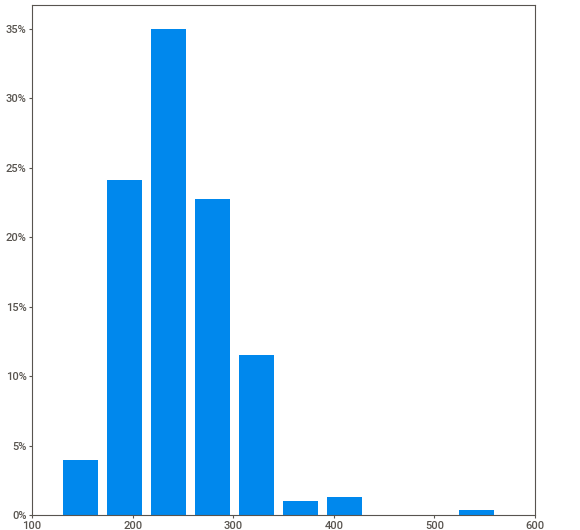
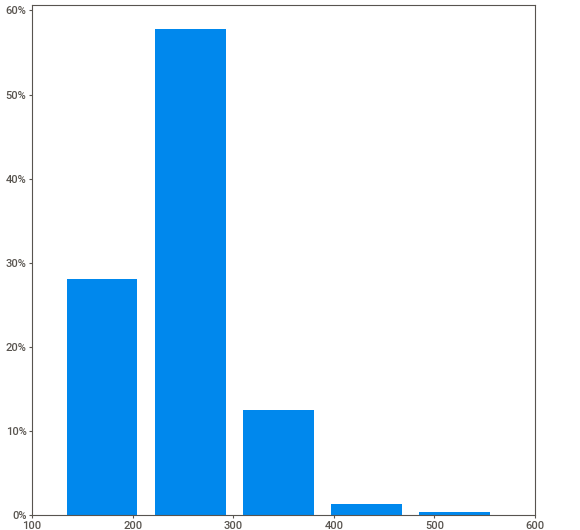
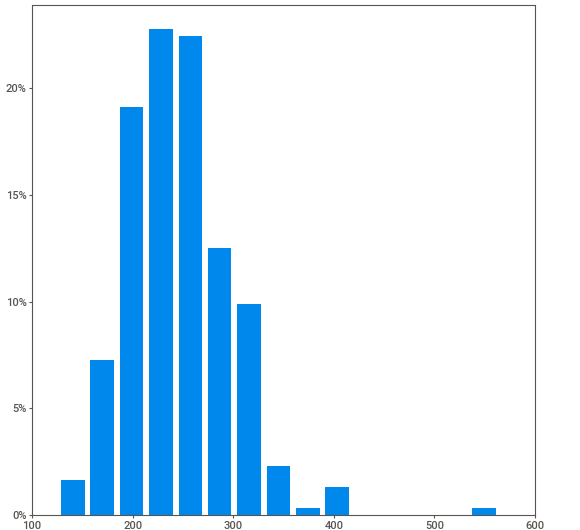
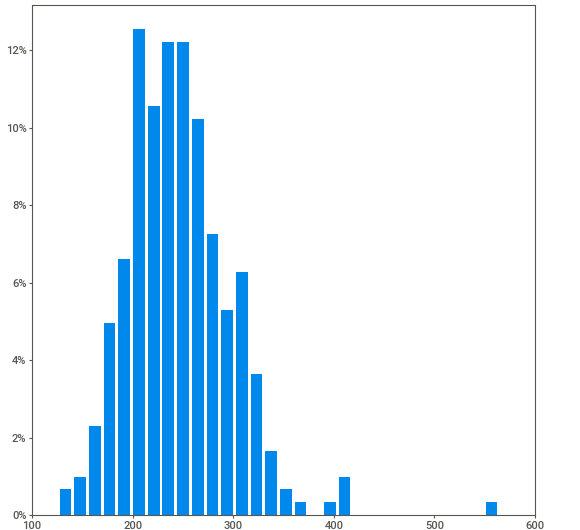
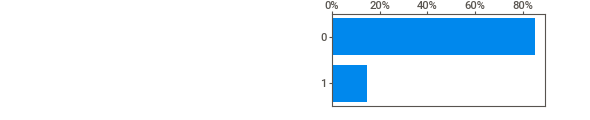
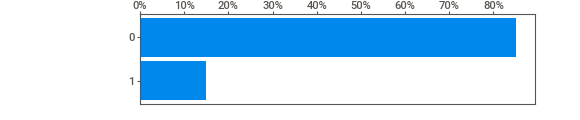
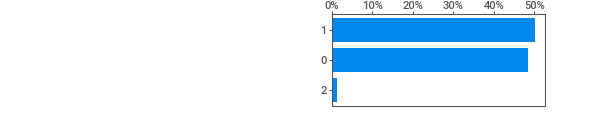
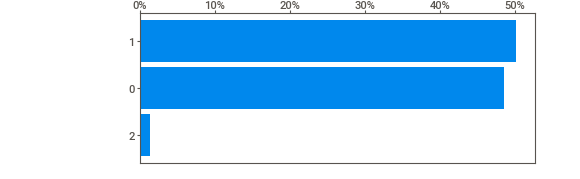
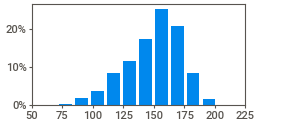
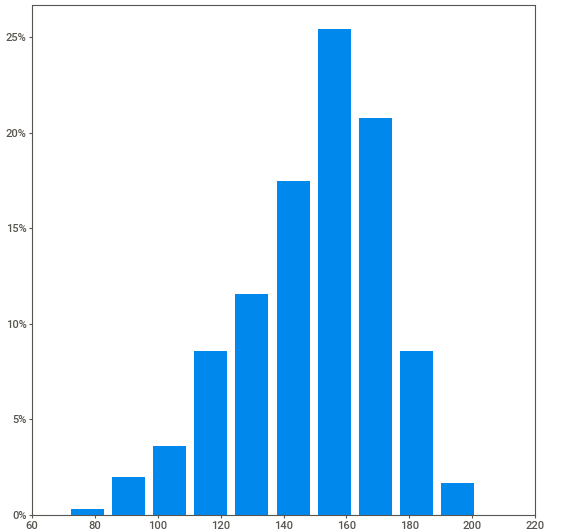
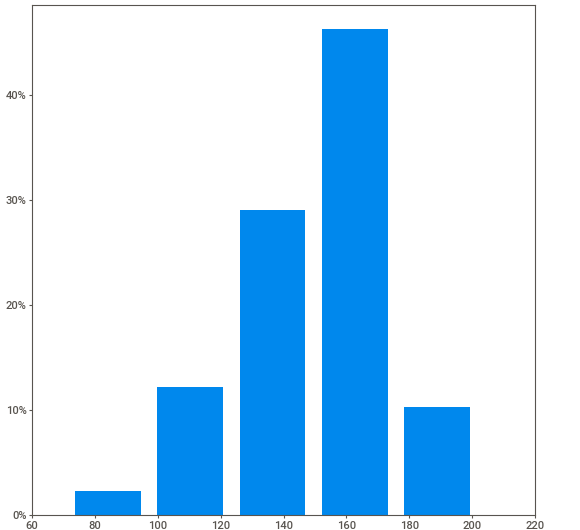
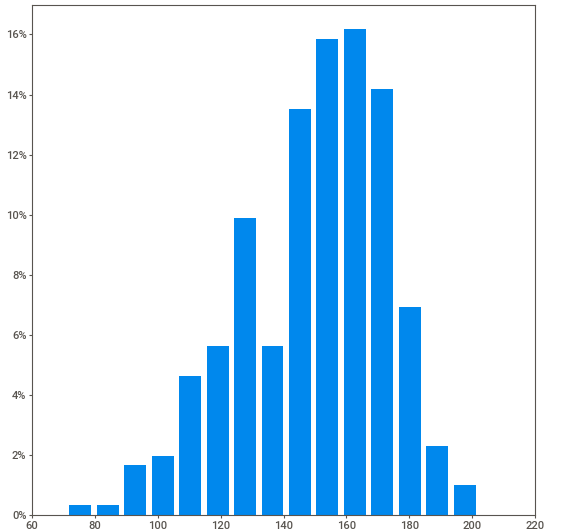
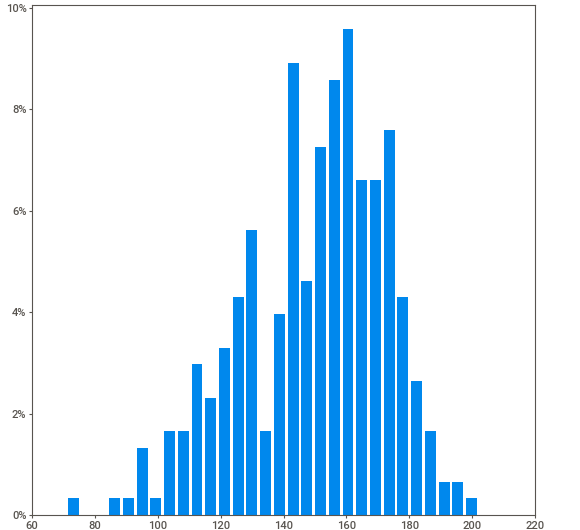
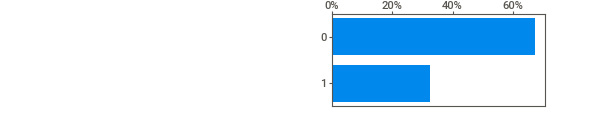
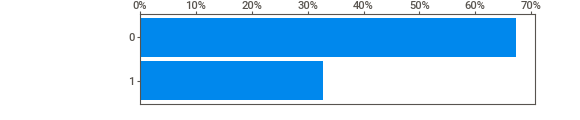
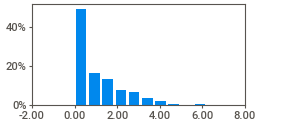
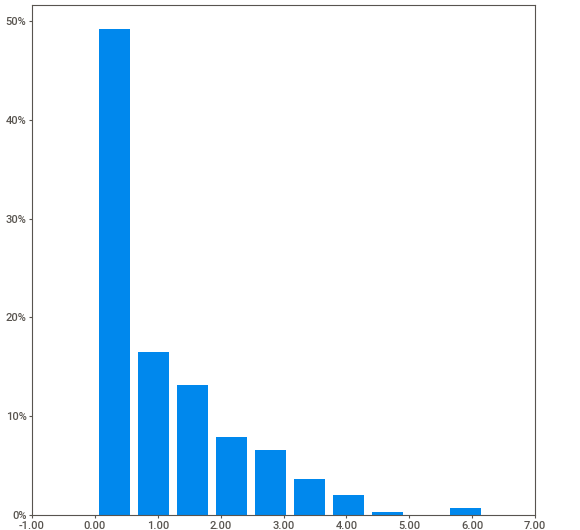
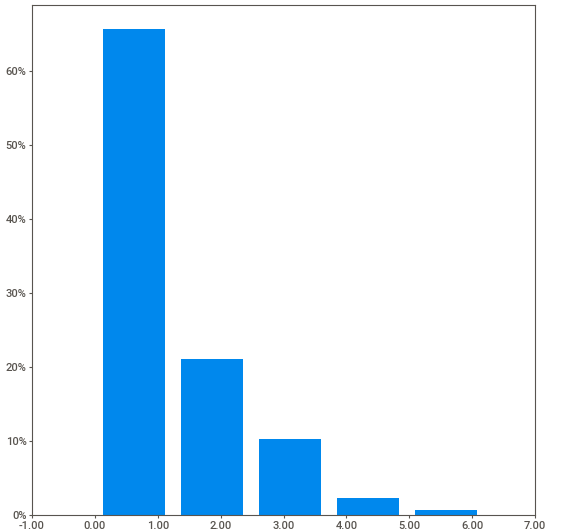
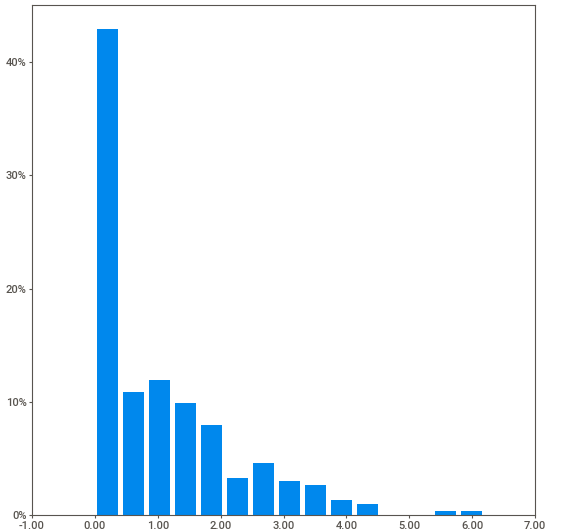
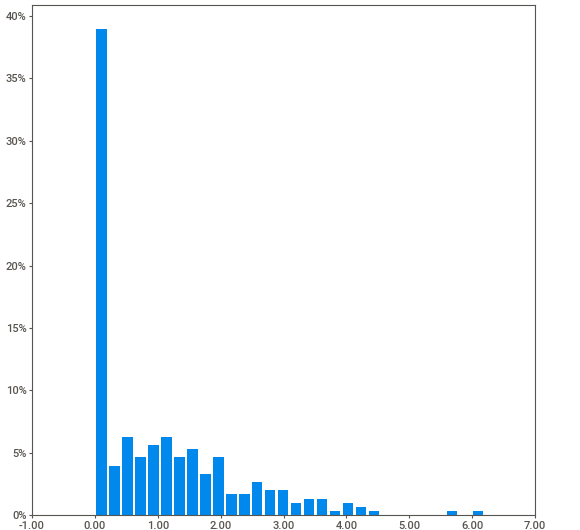
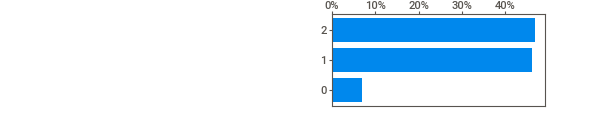
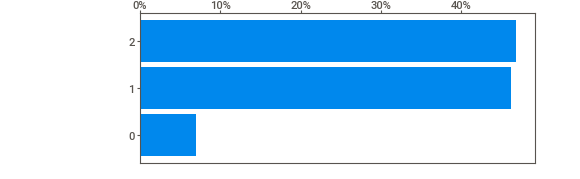
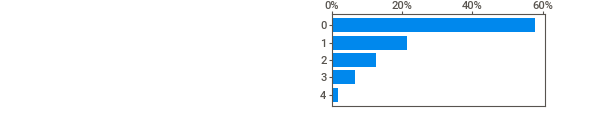
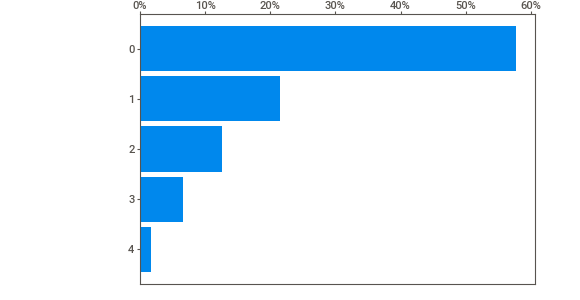
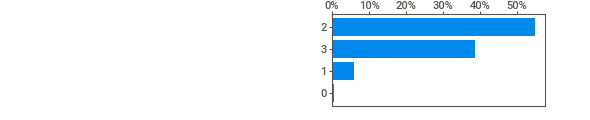
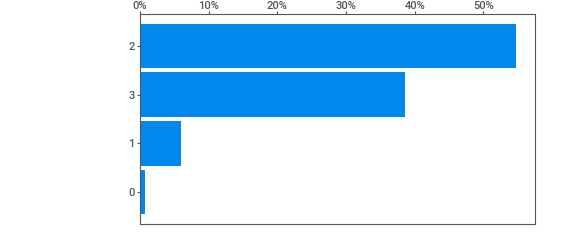
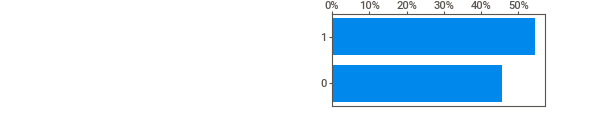
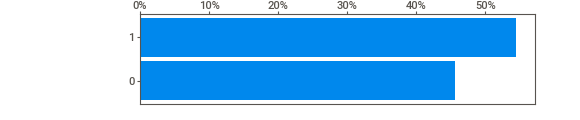
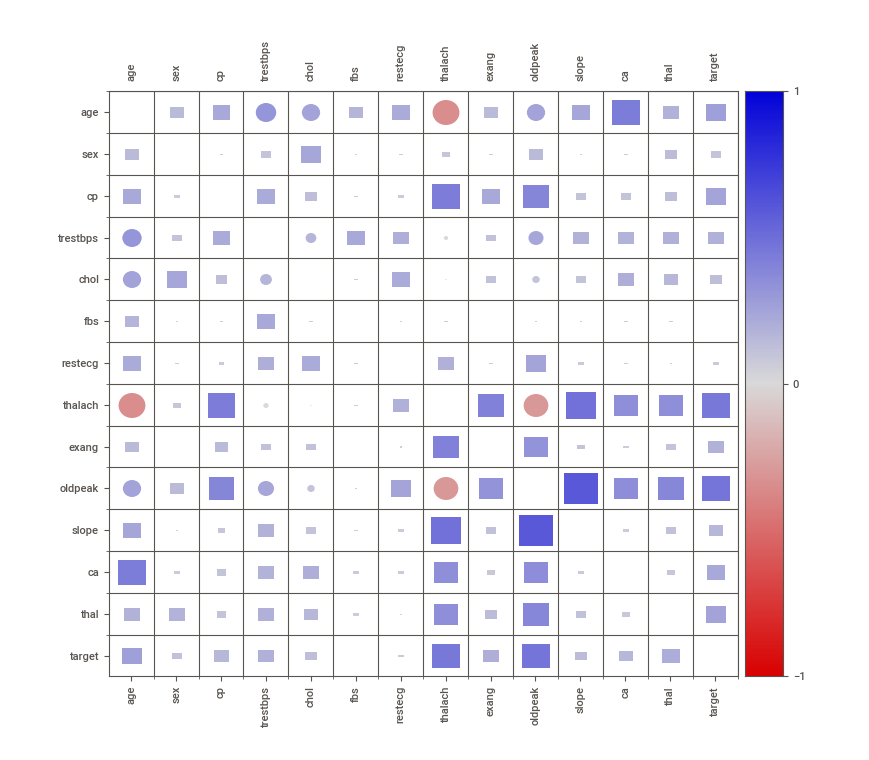
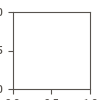

In [ ]:
import pandas as pd
import sweetviz as sv

# Load your data
data = pd.read_csv('/content/heart.csv')

# Generate a Sweetviz report for the dataset
report = sv.analyze(data)

# Display the report in a Jupyter Notebook
report.show_notebook()


As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#from imblearn.over_sampling import SMOTE #--------------------> optional --> accuracy increased


# Separate features and target variable
#X = df.drop(columns=['target'])
#y = df['target']

# Instantiate SMOTE
#smote = SMOTE()

# Resample the dataset
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
#print(y_resampled.value_counts())


1    165
0    165
Name: target, dtype: int64


In [ ]:
#x=X_resampled
#y=y_resampled

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt=dt.fit(x_train,y_train)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_pred,y_test)

0.696969696969697

In [ ]:
from sklearn import tree

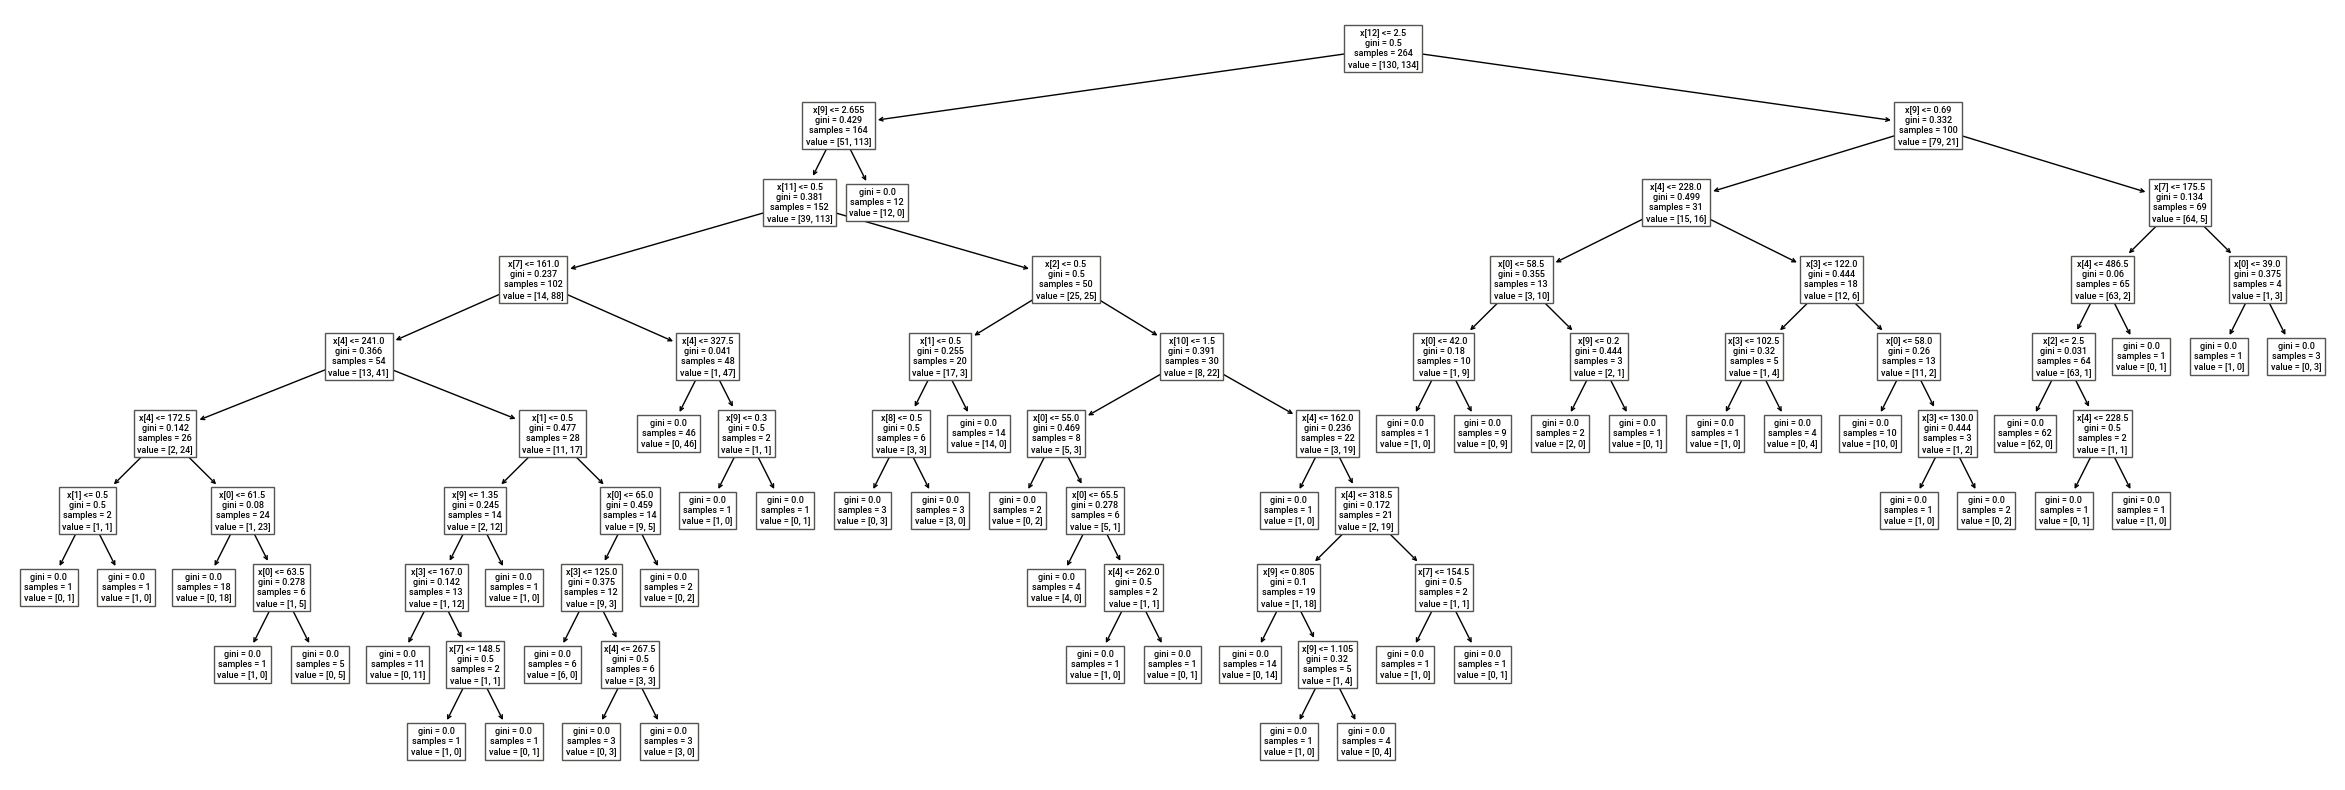

In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(dt)
plt.show()


In [ ]:
!pip install scikit-learn matplotlib graphviz

In [ ]:
import graphviz

In [ ]:
y = y.astype(str)

In [ ]:
class_names = y.unique()
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree visualization as a PDF or PNG file
graph.view("decision_tree")    # Open the tree visualization using the default viewer

'decision_tree.pdf'

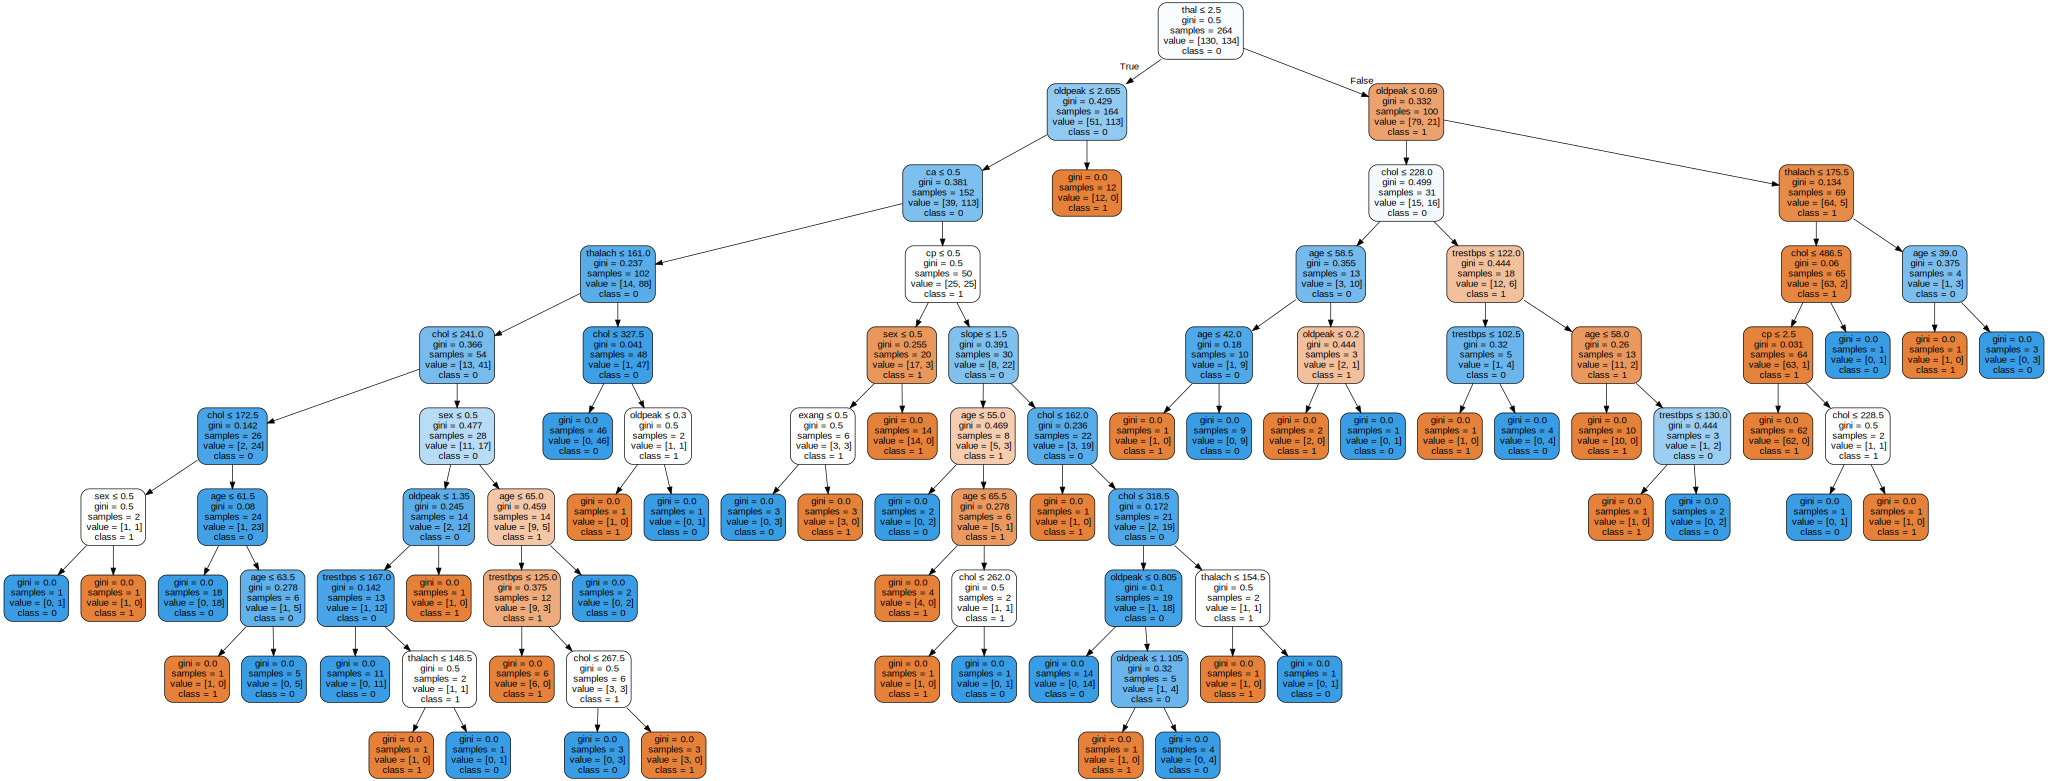

In [ ]:
graph

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
# toincrease accuracy by using the above given parameters

In [ ]:
dt=DecisionTreeClassifier()# DT model
grid_search = GridSearchCV(dt, param_grid, cv=5) # performing hyperparameter tuning ---> DT and parameters and telling CV should be 5 times
grid_search.fit(x_train, y_train)# training my model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_param=grid_search.best_params_
best_dt=grid_search.best_estimator_

In [ ]:
best_param

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
pred=best_dt.predict(x_test)

In [ ]:
accuracy_score(pred,y_test)

0.7575757575757576

In [ ]:
grid_search.best_score_

0.7615384615384615

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00679731, 0.01243191, 0.00495415, 0.01605921, 0.01414018,
        0.00706244, 0.00446739, 0.00440454, 0.00732613, 0.00477285,
        0.00472975, 0.00460453, 0.00463409, 0.00442095, 0.00540366,
        0.0062604 , 0.00409775, 0.0042275 , 0.00421638, 0.0040834 ,
        0.00416665, 0.00438561, 0.00464973, 0.00724335, 0.00412292,
        0.00390577, 0.00646143, 0.00677319, 0.00498948, 0.0043581 ,
        0.00424423, 0.00425358, 0.00676217, 0.0060595 , 0.00417762,
        0.00414968, 0.00827026, 0.00482264, 0.00412049, 0.00412059,
        0.00419269, 0.00419493, 0.00418468, 0.00416331, 0.00395145,
        0.00398231, 0.00459547, 0.00473957, 0.00989265, 0.0072835 ,
        0.00926147, 0.01089363, 0.00426912, 0.01343727, 0.00972657,
        0.00443778, 0.00519052, 0.00414543, 0.00482883, 0.00404406,
        0.00406365, 0.00410824, 0.00561404, 0.00450506, 0.00543532,
        0.00485744, 0.00468841, 0.0049336 , 0.00495806, 0.00522494,
        0.00557346, 0.00472684]

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006797,0.003724,0.004970,0.003497,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.792453,0.660377,0.698113,0.698113,0.769231,0.723657,0.049232,33
1,0.012432,0.004436,0.004691,0.002943,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.773585,0.641509,0.660377,0.716981,0.807692,0.720029,0.063696,43
2,0.004954,0.000948,0.003429,0.000687,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.830189,0.660377,0.641509,0.754717,0.750000,0.727358,0.068836,27
3,0.016059,0.011442,0.013520,0.007396,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.830189,0.641509,0.603774,0.792453,0.750000,0.723585,0.087059,35
4,0.014140,0.014874,0.006959,0.004981,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.830189,0.641509,0.660377,0.754717,0.730769,0.723512,0.067995,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.004934,0.000492,0.003276,0.000449,entropy,15,2,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.849057,0.603774,0.716981,0.698113,0.692308,0.712046,0.078871,57
68,0.004958,0.000958,0.003027,0.000061,entropy,15,2,10,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.792453,0.603774,0.773585,0.716981,0.692308,0.715820,0.066810,50
69,0.005225,0.001429,0.003088,0.000159,entropy,15,4,2,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.849057,0.660377,0.716981,0.735849,0.730769,0.738607,0.061410,17
70,0.005573,0.000972,0.003736,0.001151,entropy,15,4,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.754717,0.660377,0.735849,0.735849,0.730769,0.723512,0.032609,38
